# VegaLite (Scatter & Bar Plots)

In [1]:
using DataFrames
using Queryverse
using VegaLite
using VegaDatasets

In [2]:
# Import the deattle_weather data
seattle_weather = dataset("seattle-weather") |> DataFrame;
first(seattle_weather, 4)

,date,precipitation,temp_max,temp_min,wind,weather
,Dates…,Float64,Float64,Float64,Float64,String
1,"Date(""2012-01-01"")",0.0,12.8,5.0,4.7,drizzle
2,"Date(""2012-01-02"")",10.9,10.6,2.8,4.5,rain
3,"Date(""2012-01-03"")",0.8,11.7,7.2,2.3,rain
4,"Date(""2012-01-04"")",20.3,12.2,5.6,4.7,rain


## Dot Plot

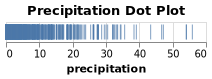

In [3]:
@vlplot(
  data = seattle_weather,
  mark = :tick,
  title = "Precipitation Dot Plot",
  x = :precipitation,
)

In [4]:
# Bring in Cars data set
cars  = dataset("cars") |> DataFrame;
first(cars, 4)


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64⍰,Int64,Float64,Int64⍰
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150


## Strip Plot

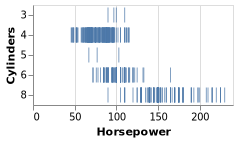

In [5]:
@vlplot(
  data = cars,
  mark = :tick,
  x = :Horsepower,
  y = "Cylinders:o"
)

## Simple Scatter Plot

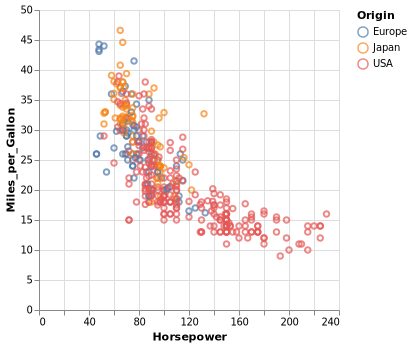

In [6]:


@vlplot( 
  data = cars, 
  mark = :point, 
  x= :Horsepower, 
  y= :Miles_per_Gallon, 
  color = :Origin, 
  width = 300,
  height = 300
)

## Scatter Plot by Color

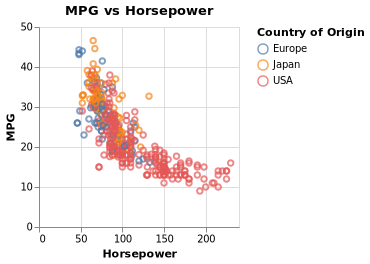

In [7]:
# You can use brackets for customization


@vlplot(
  data = cars,
  mark = {:point},
  x  = {:Horsepower},
  y = {:Miles_per_Gallon, title = "MPG"},
  color = {:Origin, title="Country of Origin"},  # Important code here
  title = "MPG vs Horsepower"
 )

## Scatter Plot by Columns

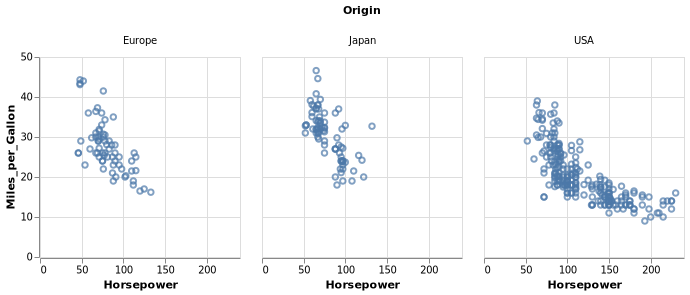

In [8]:
## Separates the categorical field "Origin" into different plots


@vlplot(
  data = cars, 
  mark = :point, 
  x = :Horsepower,  
  y = :Miles_per_Gallon, 
  column = :Origin  # Important code here
)

## Scatter Plot by Shape

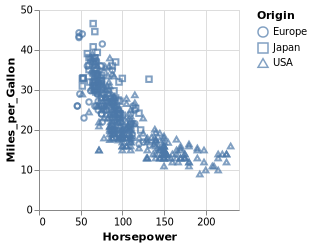

In [9]:
@vlplot(
  data = cars, 
  mark = :point, 
  x = :Horsepower,  
  y = :Miles_per_Gallon, 
  shape = :Origin  # Important code here
)

## Scatter Plot by Text

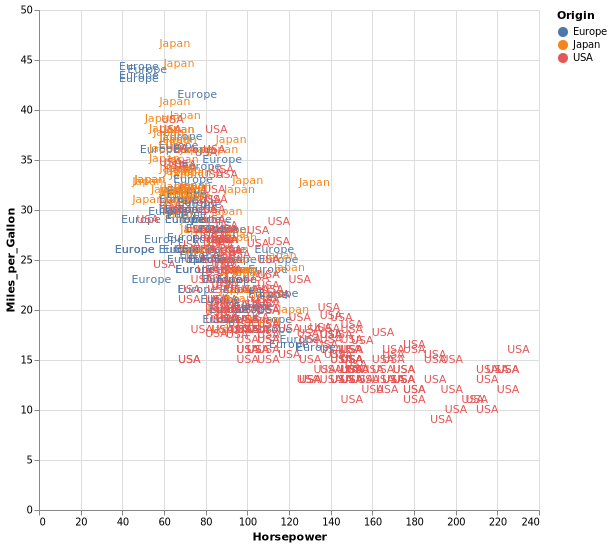

In [10]:
@vlplot(
  data = cars, 
  mark = :text, # Text is the mark in this case not point (first position)
  x = :Horsepower,  
  y = :Miles_per_Gallon,
  text = :Origin, # Text reflect the origin
  color= :Origin,
  height = 500,
  width = 500
)

## Nominal vs Continuous Variable
* The variable Cylinders may be continous "Cylinders:o" or nominal "Cylinders:n"

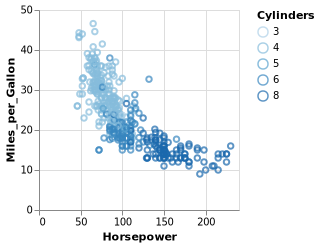

In [11]:
# Continous "Cylinders" as a color

cars |>
@vlplot(
    mark=:point,
    x=:Horsepower,
    y=:Miles_per_Gallon,
    color="Cylinders:o"
)




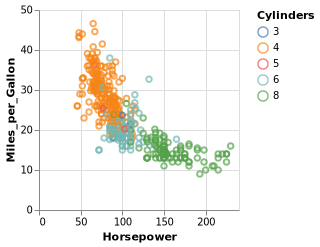

In [12]:
# Nominal "Cylinders" as a color

cars |>
@vlplot(
    mark=:point,
    x=:Horsepower,
    y=:Miles_per_Gallon,
    color="Cylinders:n"
)


## Aggregations

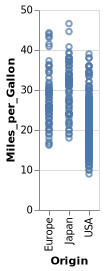

In [13]:
# Data without Aggregations

cars |> 
@vlplot(mark=:point, x=:Origin, y=:Miles_per_Gallon)

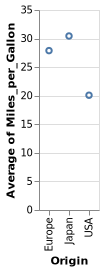

In [14]:
# Data with Aggregations (use average(Miles_per_Gallon))

cars |> 
@vlplot(mark=:point, x=:Origin, y="average(Miles_per_Gallon)")

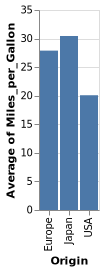

In [15]:
# The above chart as a bar graph

cars |> 
@vlplot(mark=:bar, x=:Origin, y="average(Miles_per_Gallon)")

# Bar Charts

## Responsive Bar Chart

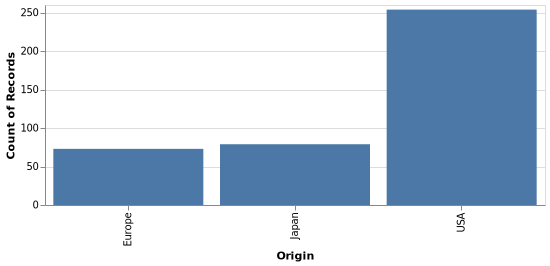

In [16]:
cars |>
@vlplot(
  mark = :bar,
  x = :Origin,
  y = "count()",
  height = 200,
  width = 500
  
)
  

In [17]:
# Year 2000 population 

population1  =  
dataset("population") |> 
@filter(_.year == 2000) |>
DataFrame

first(population1, 4)


,year,age,sex,people
,Int64,Int64,Int64,Int64
1,2000,0,1,9735380
2,2000,0,2,9310714
3,2000,5,1,10552146
4,2000,5,2,10069564


## Bar Chart of Year 2000 population by Age

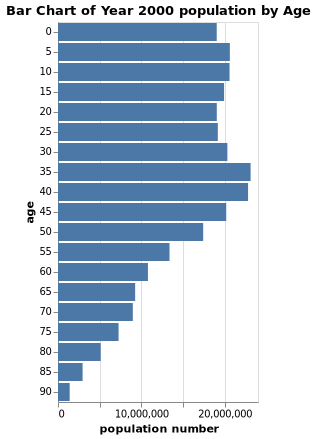

In [18]:
population1 |> 
@vlplot(
  y = "age:n",
  x = {"sum(people)", title = "population number"},
  mark = :bar,
  title = "Bar Chart of Year 2000 population by Age"
  
)

## Sorted Bar Chart

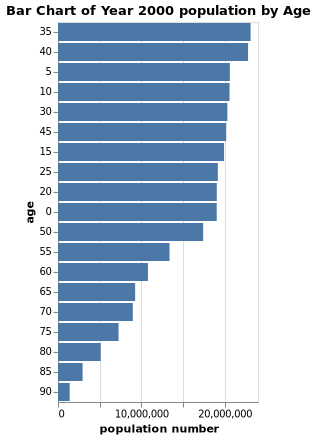

In [19]:
population1 |> 
@vlplot(
  y = {"age:n", sort = "-x"}, # Sort decending 
  x = {"sum(people)", title = "population number"},
  mark = :bar,
  title = "Bar Chart of Year 2000 population by Age"
  
)

In [20]:
# Transform the data to have a "gender column

D = Dict(1=>"Male", 2=>"Female");

population2  =  
dataset("population") |> 
@mutate(gender = D[_.sex]) |>
@filter(_.year == 2000) |>
@select(-:sex) |>
DataFrame;

first(population2, 4)

,year,age,people,gender
,Int64,Int64,Int64,String
1,2000,0,9735380,Male
2,2000,0,9310714,Female
3,2000,5,10552146,Male
4,2000,5,10069564,Female


## Grouped Bar Graph

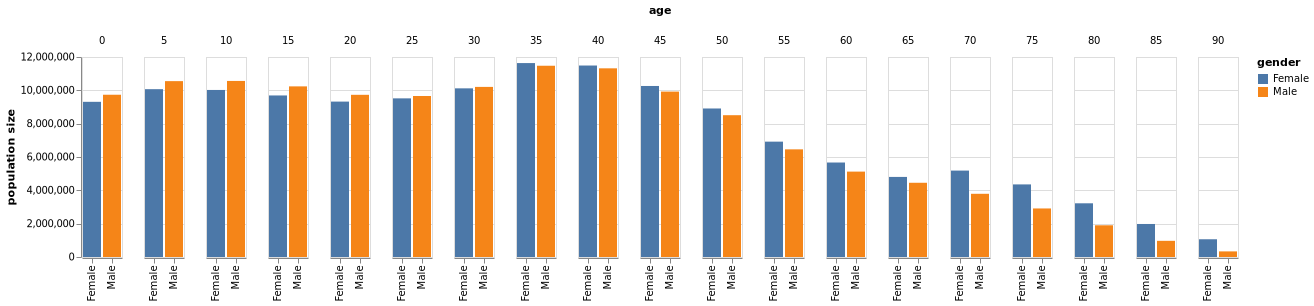

In [21]:
@vlplot(
  data = population2,
  y = {"sum(people)", title = "population size"}, # Rename y-axis to population size
  x = {"gender:n", title = ""}, # Remove repeated gender
  mark =  :bar,  # It's a bar graph
  column = "age:n", # Age is a column
  color = "gender:n" # Gender is the color
  
)



In [22]:
# Seatle weather

weather_seatle = dataset("seattle-weather") |> DataFrame;
first(weather_seatle,4)

,date,precipitation,temp_max,temp_min,wind,weather
,Dates…,Float64,Float64,Float64,Float64,String
1,"Date(""2012-01-01"")",0.0,12.8,5.0,4.7,drizzle
2,"Date(""2012-01-02"")",10.9,10.6,2.8,4.5,rain
3,"Date(""2012-01-03"")",0.8,11.7,7.2,2.3,rain
4,"Date(""2012-01-04"")",20.3,12.2,5.6,4.7,rain


## Bar Plot by Color

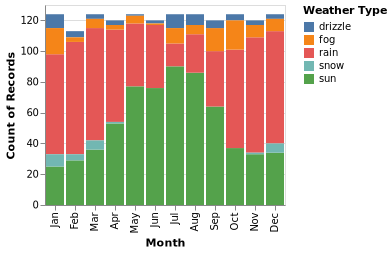

In [23]:
@vlplot(
  data  = weather_seatle,
  mark = :bar,
  x = {"month(date):n", title = "Month"},
  y = "count()",
  color = {:weather, title = "Weather Type"}
)


## Bar Plot by Color + Control for Color Field Order and Color Type

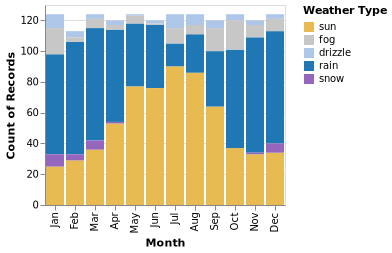

In [24]:
@vlplot(
  data  = weather_seatle,
  mark = :bar,
  x = {"month(date):n", title = "Month"},
  y = "count()",
  color = {:weather, title = "Weather Type", scale ={domain=["sun","fog","drizzle","rain","snow"], range=["#e7ba52","#c7c7c7","#aec7e8","#1f77b4","#9467bd"]}} # Define the domain and range here
)

## Bar Plot by Color + Control for Color Field Order and Color Type (Domain and range defined outside function)

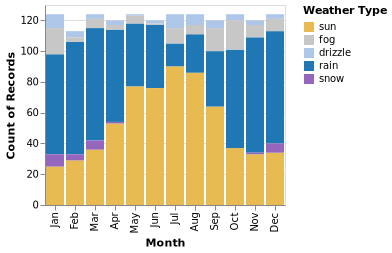

In [25]:
domain_c=["sun","fog","drizzle","rain","snow"];
range_c=["#e7ba52","#c7c7c7","#aec7e8","#1f77b4","#9467bd"];

@vlplot(
  data  = weather_seatle,
  mark = :bar,
  x = {"month(date):n", title = "Month"},
  y = "count()",
  color = {:weather, title = "Weather Type", scale ={domain=domain_c, range=range_c}}
)

In [26]:
# DataTable

first(population2, 6)

,year,age,people,gender
,Int64,Int64,Int64,String
1,2000,0,9735380,Male
2,2000,0,9310714,Female
3,2000,5,10552146,Male
4,2000,5,10069564,Female
5,2000,10,10563233,Male
6,2000,10,10022524,Female


## Stacked Bar Chart

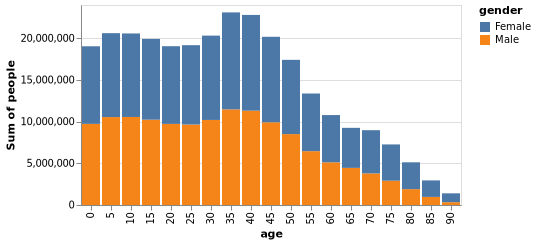

In [27]:
@vlplot(
  data = population2,
  mark = :bar,
  x = "age:o",
  y = "sum(people)",
  color = "gender:n"

)

## Normalized (Percentage) Stacked Bar Chart

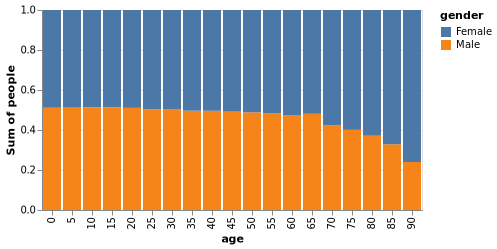

In [28]:
@vlplot(
  data = population2,
  mark = :bar,
  x = "age:o",
  y = {"sum(people)", stack=:normalize},
  color = "gender:n"

)